# Tutorial 3: Mouse Postnatal day 22 Brain (Spatial ATAC-RNA-seq)
This tutorial show the application of CadaST in spatial epignomics and transcriptomics data (MB P22).

The dataset could be downloaded from [Gene Expression Omnibus](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE171943)

In [1]:
import os 
import warnings
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cadast import CadaST

In [2]:
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (3, 3)

## Load the data

In [3]:
data_path = "../dataset/ATAC"
input_dir = os.path.join(data_path, "p22.h5ad")
adata = sc.read(input_dir)
adata

AnnData object with n_obs × n_vars = 9215 × 42032
    obs: 'RNA_clusters', 'ATAC_clusters'
    uns: 'ATAC_clusters_colors'
    obsm: 'spatial'

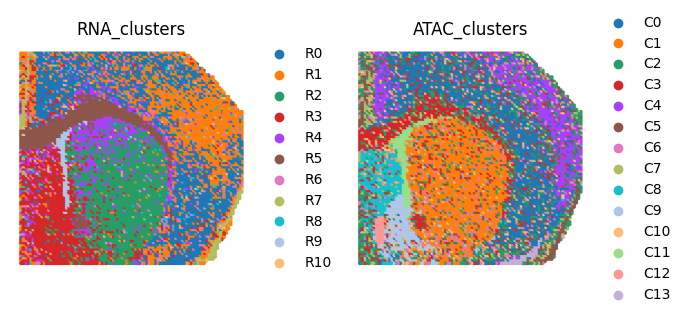

In [4]:
# Visualize the clusterings results from origin study 
sc.pl.embedding(adata, basis="spatial", frameon=False, color=["RNA_clusters", "ATAC_clusters"], size=30)

## Preprocess the data

In [5]:
# the normalization and log step was already done in the original study 
# sc.pp.normalize_total(adata_atac, target_sum=1e5)
# sc.pp.log1p(adata_atac)
sc.pp.scale(adata, max_value=10)

## Run CadaST 

In [6]:
beta, alpha, theta, init_alpha = 1000, 0.6, 0.2, 1
icm_iter = 2
max_iter = 4
n_components = 3 # add the number of possible state for better atac data fitness 
kneighbors = 16
n_top = 3000 # choose the top variable genes/peaks
model = CadaST(
    adata,
    kneighbors=kneighbors,
    beta=beta,
    icm_iter=icm_iter,
    alpha=alpha,
    theta=theta,
    init_alpha=init_alpha,
    n_components=n_components,
    max_iter=max_iter,
    n_top=n_top,
)
adata_fit = model.fit()

Constructing Graph
Initializing neighbor correlation matrix
Initialized model with beta: 1000, alpha: 0.6, theta: 0.2
Filtering genes with top 3000 SVG features
Start CadaST model fitting


100%|██████████| 3000/3000 [00:29<00:00, 102.15it/s]


## Clustering using leiden and visualize the domain in umap and spatial basis

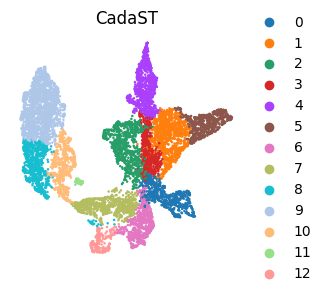

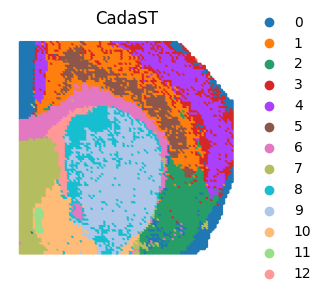

In [7]:
# Visualize the clustering results
sc.pp.pca(adata_fit, n_comps=20)
sc.pp.neighbors(adata_fit)
sc.tl.umap(adata_fit)
sc.tl.leiden(adata_fit, resolution=0.3, flavor="igraph", n_iterations=2)
sc.pl.umap(adata_fit, color=["leiden"], frameon=False, title="CadaST")
sc.pl.embedding(adata_fit, basis="spatial", frameon=False, color=["leiden"], size=30, title="CadaST")